# Task 2: Exploratory Data Analysis on Titanic Dataset

## Description:

1. Dataset (Recommended): Titanic: Machine Learning from Disaster (Kaggle}
2. Explore the classic Titanic dataset using Python
3. Perform data cleaning: handle missing values, convert types
4. Generate summary statistics and group-based insights (e.g., survival by gender/class)
5. Visualize key patterns and correlations

## Tools & Libraries:

Python, Pandas, Seaborn or Matplotlib

## Covered Topics

EDA | Data types & missing data| Data visualization

## Bonus:

Visualize survival rates using bar plots and heatmaps


**📊 Covered Topics**

✔ Data types & conversion

✔ Handling missing data

✔ Group-based insights using groupby

✔ Visualization using Seaborn/Matplotlib

✔ Correlation heatmap and survival rate analysis

**🎁 Bonus Visualization Ideas**

✅ Bar plot: Survived vs Sex

✅ Bar plot: Survived vs Pclass

✅ Heatmap of numerical correlations



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

C:\Users\Manzar\AppData\Local\Temp\ipykernel_7404\1581130157.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Manzar\AppData\Local\Temp\ipykernel_7404\1581130157.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

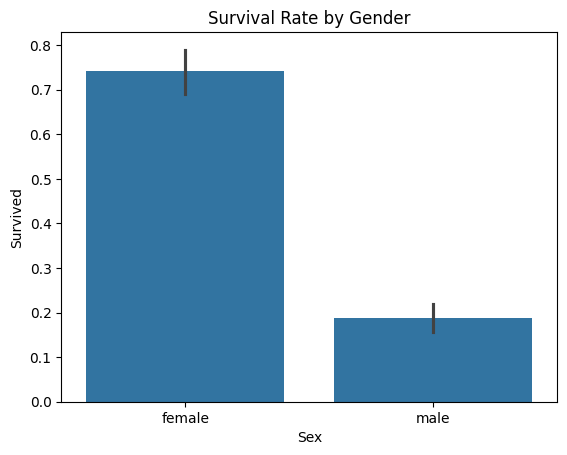

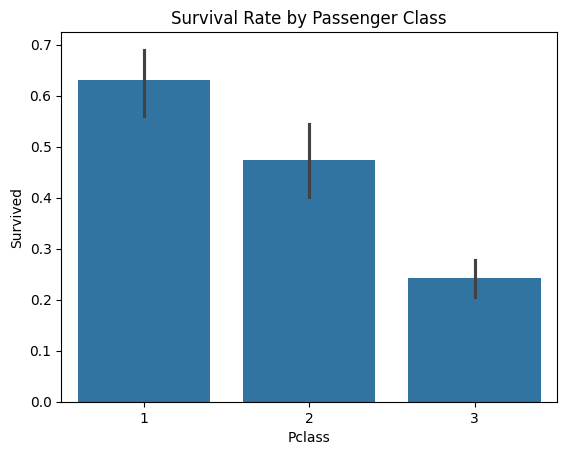

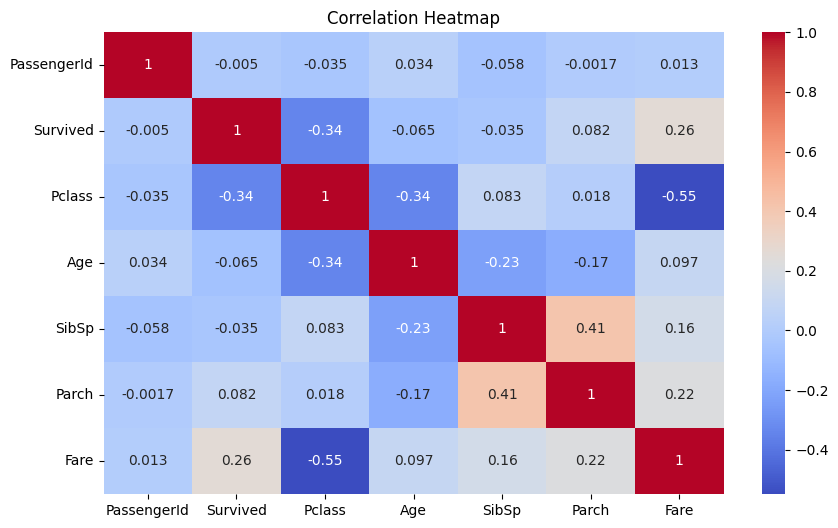

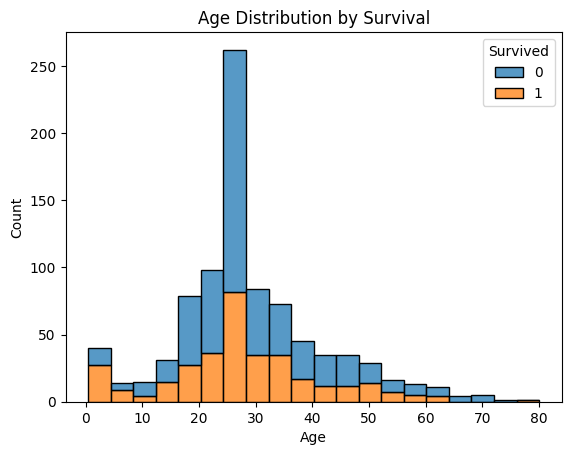

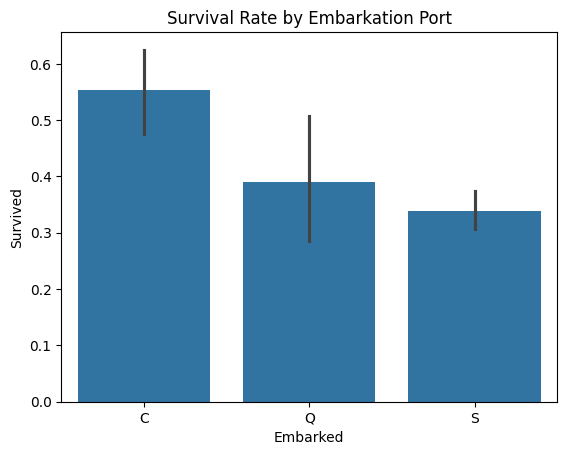


Cleaned dataset saved as 'titanic_cleaned.csv'.


In [1]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the Titanic dataset
df = pd.read_csv('Titanic.csv')  # ensure the CSV file is in your working directory

# Step 3: Overview of the dataset
print(df.head())
print(df.info())
print(df.describe())

# Step 4: Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Step 5: Data Cleaning
# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to too many missing values
df.drop(columns='Cabin', inplace=True)

# Drop any remaining missing values (if any)
df.dropna(inplace=True)

# Convert 'Sex' and 'Embarked' to category
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Step 6: Summary statistics
print("\nSurvival Rate by Gender:\n", df.groupby('Sex')['Survived'].mean())
print("\nSurvival Rate by Passenger Class:\n", df.groupby('Pclass')['Survived'].mean())

# Step 7: Visualizations

# 1. Survival by Gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# 2. Survival by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# 3. Heatmap of correlations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4. Age distribution by Survival
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title('Age Distribution by Survival')
plt.show()

# 5. Survival rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarkation Port')
plt.show()
# Step 8: Save the cleaned dataset
df.to_csv('titanic_cleaned.csv', index=False)   
print("\nCleaned dataset saved as 'titanic_cleaned.csv'.")


